IS 4482

A3: Decision Tree Classification and Evaluation

Sarah Kim

#Task I 

In [150]:

cd_df = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_balanced.csv")

In [151]:
# Import all necessary packages

import pandas as pd
import numpy as np
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [152]:
cd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

In [153]:
cd_df.describe(include="all")

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,...,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,...,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


In [154]:
cd_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [155]:
cd_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#Task2

##A

In [156]:
cd_df['y'].value_counts()

yes    4640
no     4640
Name: y, dtype: int64

In [157]:
cd_df['y'].value_counts(normalize=True).mul(100).round(2).astype(str)+'%'

yes    50.0%
no     50.0%
Name: y, dtype: object

##B

This is a balanced dataset, as evidenced by the distribution of the yes/no classes in the target variable, y, displayed above.

##C

In [158]:
y_target = cd_df.pop('y')

#Task 3

##A

Categorical variables: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'

Quantitative variables: 'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'


##B

In [159]:
# Counts of the job variable
cd_df['job'].value_counts()

admin.           2517
blue-collar      1769
technician       1459
services          773
management        651
retired           595
student           358
entrepreneur      308
self-employed     306
unemployed        248
housemaid         216
unknown            80
Name: job, dtype: int64

In [160]:
# Counts of the marital variable
cd_df['marital'].value_counts()

married     5338
single      2900
divorced    1021
unknown       21
Name: marital, dtype: int64

In [161]:
# Counts of the education variable
cd_df['education'].value_counts()

university.degree      3007
high.school            2102
professional.course    1190
basic.9y               1177
basic.4y                895
basic.6y                458
unknown                 445
illiterate                6
Name: education, dtype: int64

In [162]:
# Counts of the default variable
cd_df['default'].value_counts()

no         7824
unknown    1456
Name: default, dtype: int64

In [163]:
# Counts of the housing variable
cd_df['housing'].value_counts()

yes        4951
no         4104
unknown     225
Name: housing, dtype: int64

In [164]:
# Counts of the loan variable
cd_df['loan'].value_counts()

no         7688
yes        1367
unknown     225
Name: loan, dtype: int64

In [165]:
# Counts of the contact variable
cd_df['contact'].value_counts()

cellular     6672
telephone    2608
Name: contact, dtype: int64

In [166]:
# Counts of the month variable
cd_df['month'].value_counts()

may    2533
jul    1477
aug    1353
jun    1169
nov     886
apr     785
oct     369
mar     313
sep     295
dec     100
Name: month, dtype: int64

In [167]:
#Counts of the day_of_week variable
cd_df['day_of_week'].value_counts()

thu    2000
wed    1861
mon    1846
tue    1810
fri    1763
Name: day_of_week, dtype: int64

In [168]:
# Counts of the poutcome variable
cd_df['poutcome'].value_counts()

nonexistent    7244
failure        1074
success         962
Name: poutcome, dtype: int64

##C

In [169]:
cd_df = cd_df.astype({'job':'category', 'marital':'category', 'education':'category', 'default':'category', 'housing':'category', 'loan':'category', 'contact':'category', 'month':'category', 'day_of_week':'category', 'poutcome':'category'})

In [170]:
cd_df.dtypes

age                  int64
job               category
marital           category
education         category
default           category
housing           category
loan              category
contact           category
month             category
day_of_week       category
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome          category
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
dtype: object

##D

In [171]:
# Make one-hot columns to replaced the category columns in the dataframe
cd_df_encoded_X = pd.get_dummies(cd_df)

##E

In [172]:
cd_df_encoded_X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


#Task 4

###A

In [173]:
random_state= 42

In [174]:
tree_model_1 = tree.DecisionTreeClassifier(random_state=random_state,ccp_alpha=.10)


####fit/train the model

In [175]:
tree_model_1 = tree_model_1.fit(cd_df_encoded_X,y_target)

####plot the tree

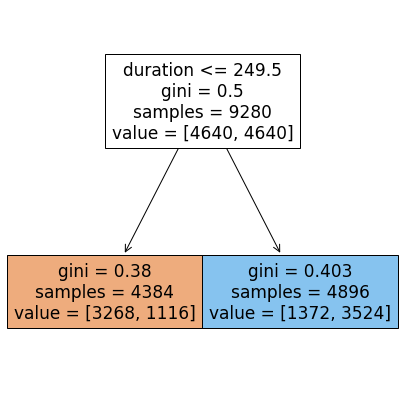

In [176]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_1,
                   feature_names=cd_df_encoded_X.columns.to_list(),
                   filled=True)

##B

The predictor is duration.

The splitting value is Duration<=249.5.






##C

##D

In [177]:
tree_model_2 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.02)
tree_model_2

tree_model_2 = tree_model_2.fit(cd_df_encoded_X,y_target)


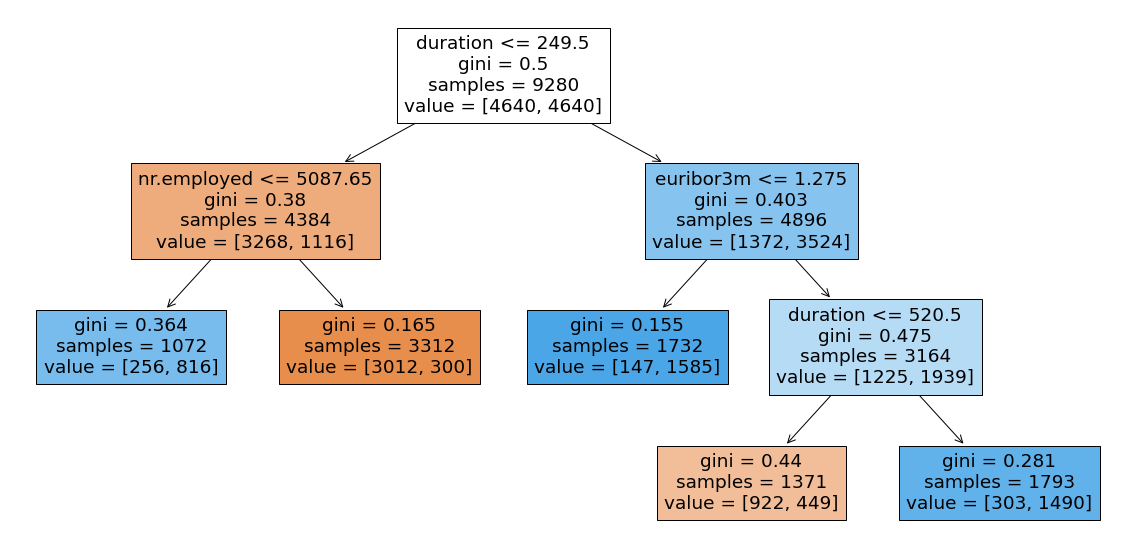

In [178]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(tree_model_2,feature_names=cd_df_encoded_X.columns.to_list(),filled=True)

In [179]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.0002)
tree_model_3
tree_model_3 = tree_model_3.fit(cd_df_encoded_X,y_target) 

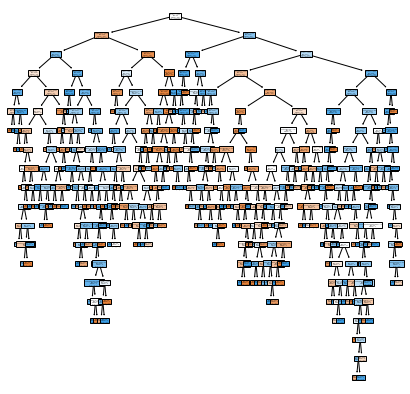

In [180]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_3,
                   feature_names=cd_df_encoded_X.columns.to_list(), 
                   filled=True) 

##E

In [181]:
model_1_pred = tree_model_1.predict(cd_df_encoded_X)

print(model_1_pred[0:10])
print(model_1_pred.shape)

['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes']
(9280,)


In [182]:
model_1_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
model_1_cf

array([[3268, 1372],
       [1116, 3524]])

In [183]:
print(metrics.classification_report(y_target, tree_model_1.predict(cd_df_encoded_X)))


              precision    recall  f1-score   support

          no       0.75      0.70      0.72      4640
         yes       0.72      0.76      0.74      4640

    accuracy                           0.73      9280
   macro avg       0.73      0.73      0.73      9280
weighted avg       0.73      0.73      0.73      9280



#Task 5

##A

In [184]:
tree_model_simp = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
tree_model_simp = tree_model_simp.fit(cd_df_encoded_X, y_target)


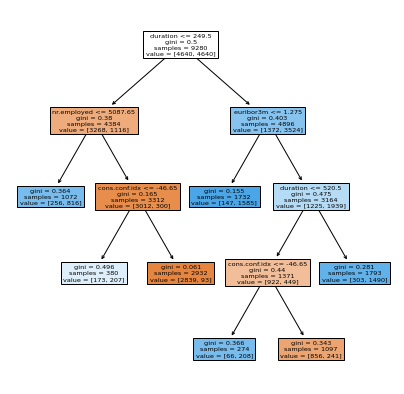

In [185]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_simp,
                   feature_names=cd_df_encoded_X.columns.to_list(),filled=True)

##B

In [186]:
model_2_pred = tree_model_simp.predict(cd_df_encoded_X)

print(model_2_pred[0:10])
print(model_2_pred.shape)

['yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes']
(9280,)


In [187]:
model_2_cf = confusion_matrix(y_true=y_target, y_pred=model_1_pred)
model_2_cf

array([[3268, 1372],
       [1116, 3524]])

In [188]:
print(metrics.classification_report(y_target, tree_model_simp.predict(cd_df_encoded_X)))


              precision    recall  f1-score   support

          no       0.92      0.80      0.85      4640
         yes       0.82      0.93      0.87      4640

    accuracy                           0.86      9280
   macro avg       0.87      0.86      0.86      9280
weighted avg       0.87      0.86      0.86      9280



#Task 6

##A

In [189]:
cd_df_encoded_X.pop('duration')


0       1575
1       1042
2       1467
3        579
4        461
        ... 
9275     115
9276      92
9277      65
9278     124
9279     170
Name: duration, Length: 9280, dtype: int64

In [190]:
tree_model_3 = tree.DecisionTreeClassifier(random_state=42,ccp_alpha=0.001)


##B

In [191]:
tree_model_3 = tree_model_3.fit(cd_df_encoded_X,y_target) 


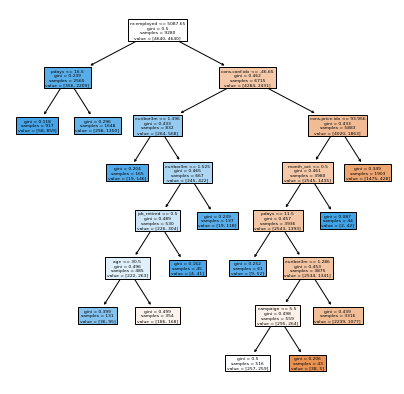

In [192]:
fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(tree_model_3,
                   feature_names=cd_df_encoded_X.columns.to_list(),filled=True)

##D

In [193]:
model_3_pred = tree_model_3.predict(cd_df_encoded_X)


In [194]:
model_3_cf = confusion_matrix(y_true=y_target, y_pred=model_3_pred)
model_3_cf

array([[3938,  702],
       [1678, 2962]])

In [195]:
print(metrics.classification_report(y_target, tree_model_3.predict(cd_df_encoded_X)))


              precision    recall  f1-score   support

          no       0.70      0.85      0.77      4640
         yes       0.81      0.64      0.71      4640

    accuracy                           0.74      9280
   macro avg       0.75      0.74      0.74      9280
weighted avg       0.75      0.74      0.74      9280



##E

Deleting the variable 'duration' has considerably debilitated the model's proficiency, whith drops in all metrics of precision, recall, f-score, accuracy, and their micro-, macro-, and average-weighted counterparts.

#Task 7

Because we changed the ccp alpha, which affects the size of the tree's nodes and leaves, certain models perform better than others. By deleting useless columns, we can trim decision trees to make them smaller and more efficient. And this prevents overfitting.

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
%%shell
jupyter nbconvert --to html '/content/gdrive/MyDrive/A3_Kim_Sarah.ipynb'

[NbConvertApp] Converting notebook /content/gdrive/MyDrive/A3_Kim_Sarah.ipynb to html
[NbConvertApp] Writing 702135 bytes to /content/gdrive/MyDrive/A3_Kim_Sarah.html
